In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [6]:
#Load the dataset
df = pd.read_csv('telco-customer-churn.csv')

#Display the first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [8]:
df2 = df.drop(columns=["gender", "customerID"])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   object 
 2   Dependents        7043 non-null   object 
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   object 
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


In [9]:
#df2['totalcharges'] = df2['totalcharges'].astype(float)

In [10]:
step1 = [len(i.split()) for i in df2['TotalCharges']] # splitting individual elements of 'Total_Charges'
step2 = [i for i in range(len(step1)) if step1[i] != 1] # storing the index values of 'Total_Charges' where length is not equal to 1.
print('Number of entries with empty string: ', len(step2))


Number of entries with empty string:  11


In [11]:
df2 = df2.drop(step2, axis = 0).reset_index(drop=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7032 non-null   int64  
 1   Partner           7032 non-null   object 
 2   Dependents        7032 non-null   object 
 3   tenure            7032 non-null   int64  
 4   PhoneService      7032 non-null   object 
 5   MultipleLines     7032 non-null   object 
 6   InternetService   7032 non-null   object 
 7   OnlineSecurity    7032 non-null   object 
 8   OnlineBackup      7032 non-null   object 
 9   DeviceProtection  7032 non-null   object 
 10  TechSupport       7032 non-null   object 
 11  StreamingTV       7032 non-null   object 
 12  StreamingMovies   7032 non-null   object 
 13  Contract          7032 non-null   object 
 14  PaperlessBilling  7032 non-null   object 
 15  PaymentMethod     7032 non-null   object 
 16  MonthlyCharges    7032 non-null   float64


In [12]:
df2['TotalCharges'] = df2['TotalCharges'].astype(float)

In [13]:
#check for duplicates
#print('Number of duplicated values in dataset: ', df2.duplicated().sum())

In [14]:
#df.drop_duplicates(inplace=True)

In [15]:
labelencoder = LabelEncoder()
def process_column(column):
    column = column.replace(["No phone service", "No internet service"], "2")
    column = column.replace("Yes", "1")
    column = column.replace("No", "0")
    return pd.to_numeric(column, errors='coerce')

columns = ["Partner", "Dependents", "PhoneService", "MultipleLines", "OnlineSecurity" ,"OnlineBackup" , "DeviceProtection", "TechSupport","StreamingTV" ,"StreamingMovies", "Churn"]

for column in columns:
    df2[column] = process_column(df2[column])

categorical_columns = ["Contract", "PaperlessBilling", "PaymentMethod","InternetService"]
for column in categorical_columns:
    df2[column] = labelencoder.fit_transform(df2[column])

print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7032 non-null   int64  
 1   Partner           7032 non-null   int64  
 2   Dependents        7032 non-null   int64  
 3   tenure            7032 non-null   int64  
 4   PhoneService      7032 non-null   int64  
 5   MultipleLines     7032 non-null   int64  
 6   InternetService   7032 non-null   int64  
 7   OnlineSecurity    7032 non-null   int64  
 8   OnlineBackup      7032 non-null   int64  
 9   DeviceProtection  7032 non-null   int64  
 10  TechSupport       7032 non-null   int64  
 11  StreamingTV       7032 non-null   int64  
 12  StreamingMovies   7032 non-null   int64  
 13  Contract          7032 non-null   int64  
 14  PaperlessBilling  7032 non-null   int64  
 15  PaymentMethod     7032 non-null   int64  
 16  MonthlyCharges    7032 non-null   float64


In [16]:
df2

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,2,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,0,0,0,45,0,2,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,1,1,24,1,1,0,1,0,1,1,1,1,1,1,3,84.80,1990.50,0
7028,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,1,103.20,7362.90,0
7029,0,1,1,11,0,2,0,1,0,0,0,0,0,0,1,2,29.60,346.45,0
7030,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [17]:
l1 = ['SeniorCitizen','Partner','Dependents'] # Customer Information
l2 = ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies',
      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'] # Services Signed Up for!
l3 = ['Contract','PaperlessBilling','PaymentMethod'] # Payment Information

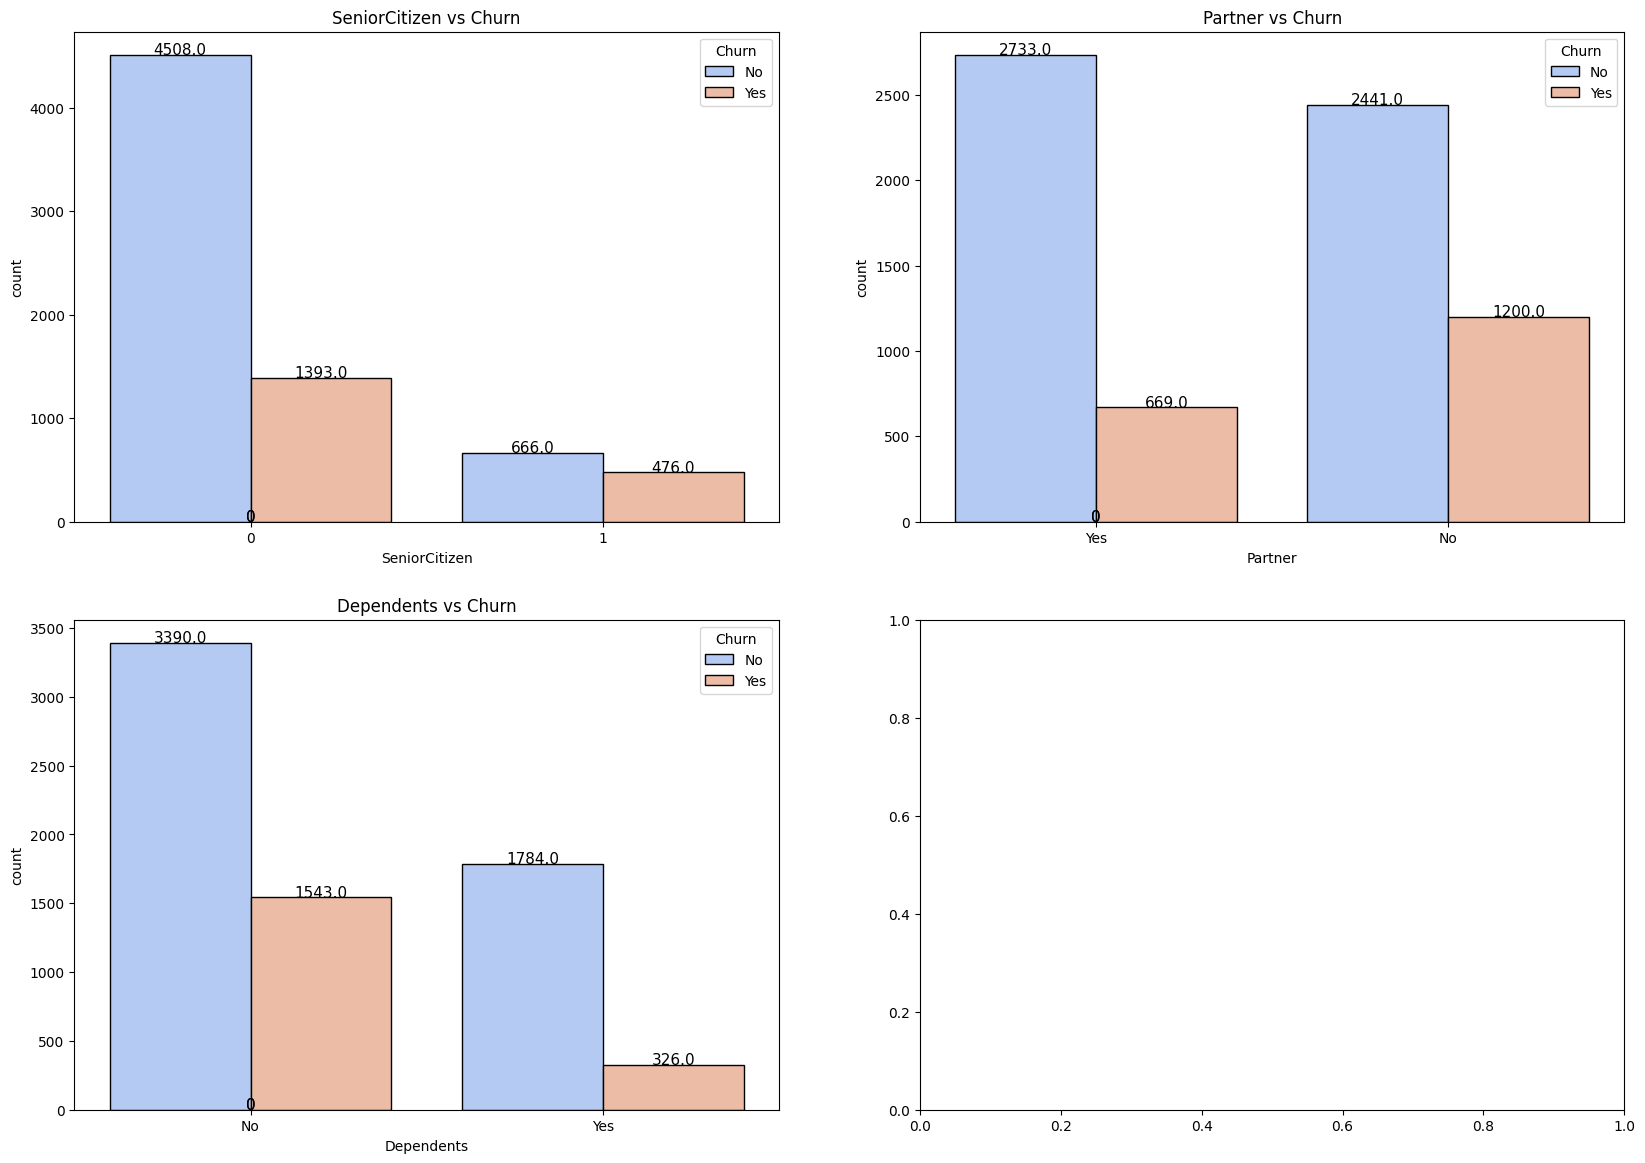

In [18]:
#SeniorCitizen | Partner | Dependents

fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
colors = 'coolwarm'
for i in range(len(l1)):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(x= l1[i],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l1[i] + ' vs Churn'
    plt.title(title);

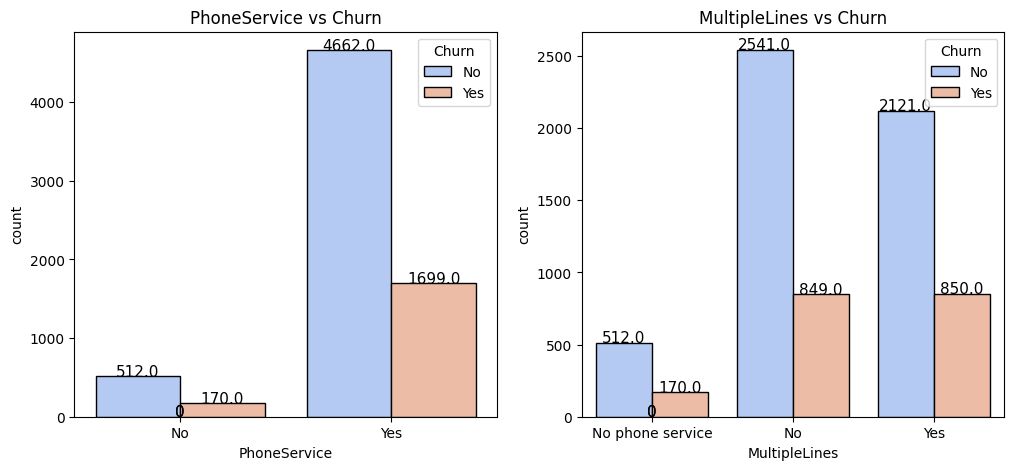

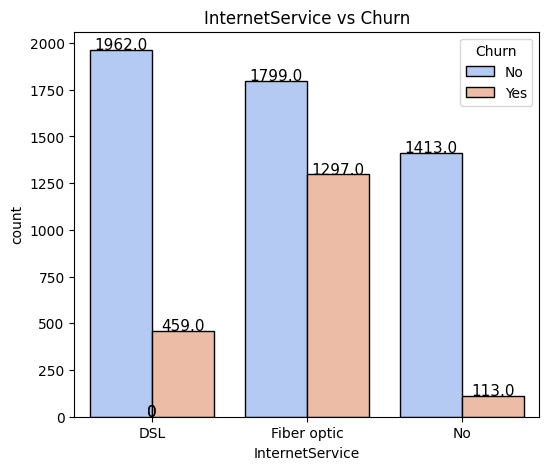

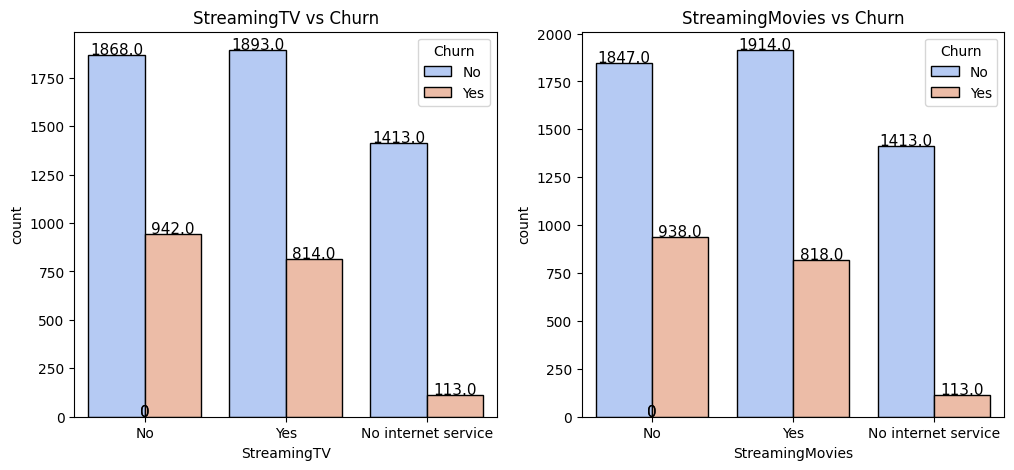

In [19]:
#PhoneService | MultipleLines | InternetService | StreamingTV | StreamingMovies

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.countplot(x=l2[i],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[i] + ' vs Churn'
    plt.title(title);

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.countplot(x=l2[2],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l2[2] + ' vs Churn'
plt.title(title);

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.countplot(x=l2[i + 3],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[i + 3] + ' vs Churn'
    plt.title(title);

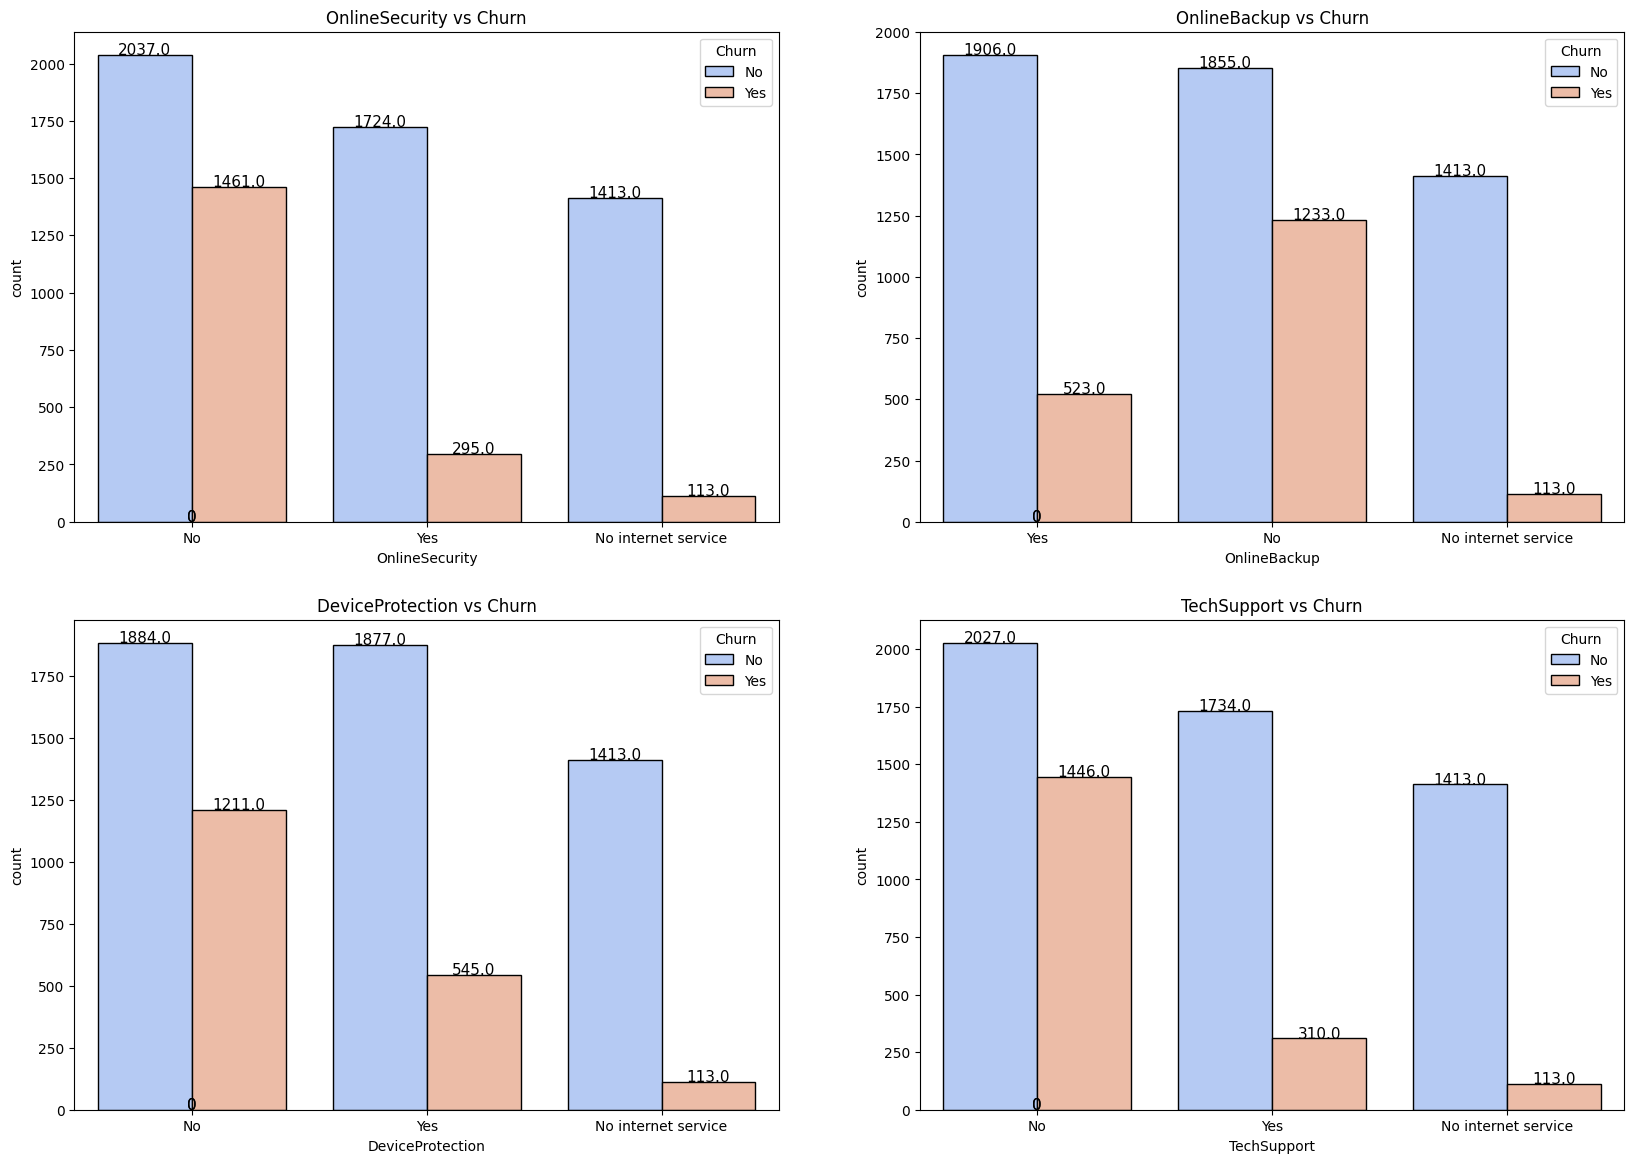

In [20]:
#OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport

fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.countplot(x=l2[-4 + i],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[-4 + i] + ' vs Churn'
    plt.title(title);

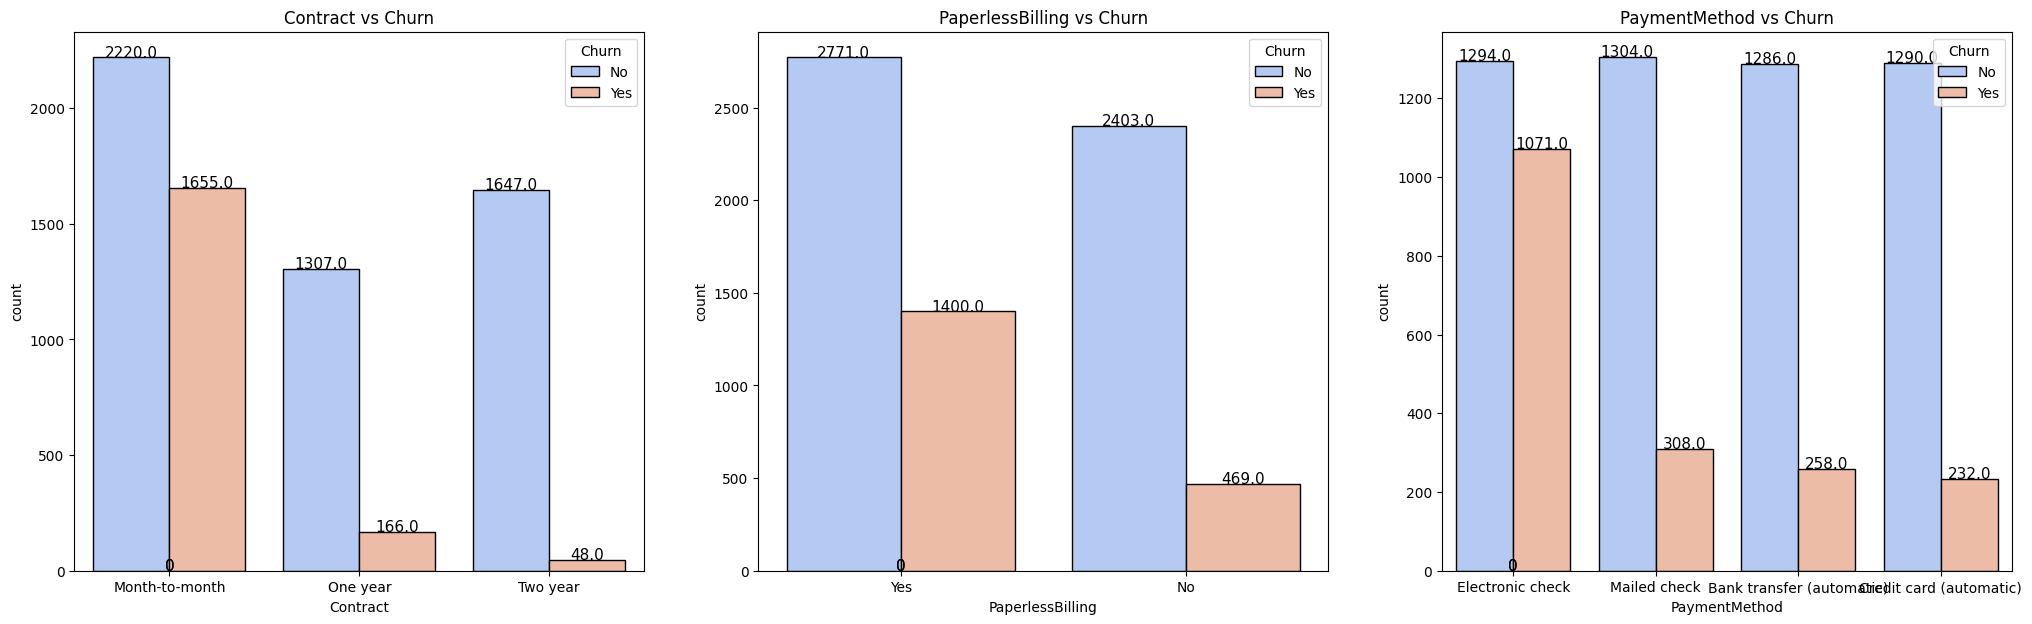

In [21]:
#Contract | PaperlessBilling | PaymentMethod
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

plt.subplot(1,3,1)
ax = sns.countplot(x=l3[0],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[0] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,2)
ax = sns.countplot(x=l3[1],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[1] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,3)
ax = sns.countplot(x=l3[2],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[2] + ' vs Churn'
plt.title(title);


<Axes: xlabel='tenure'>

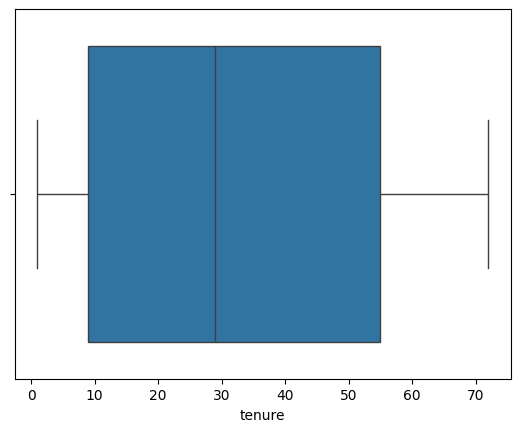

In [22]:
# Detecting Outliers
sns.boxplot(x=df2['tenure'])

<Axes: xlabel='MonthlyCharges'>

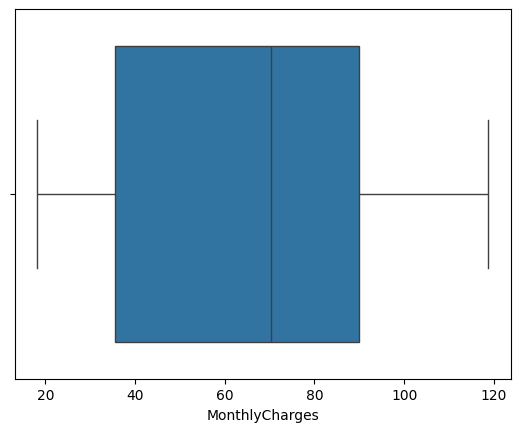

In [23]:
sns.boxplot(x=df2['MonthlyCharges'])

<Axes: xlabel='TotalCharges'>

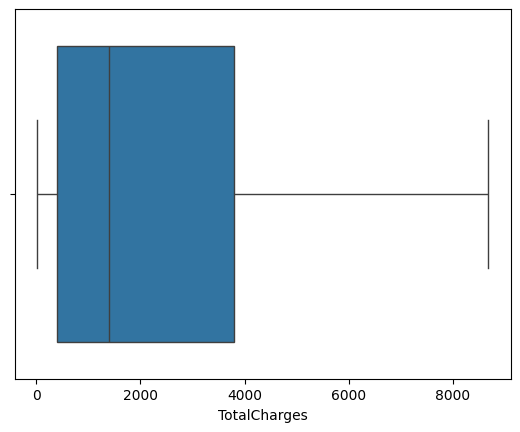

In [24]:
sns.boxplot(x=df2['TotalCharges'])

In [25]:
categorical_features=["Partner", "Dependents", "PhoneService", "MultipleLines", "OnlineSecurity" ,"OnlineBackup" , "DeviceProtection", "TechSupport","StreamingTV" ,"StreamingMovies","Contract", "PaperlessBilling", "PaymentMethod","InternetService"]
numerical_features =['tenure', 'MonthlyCharges', 'TotalCharges']
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

SeniorCitizen          0.0000
Partner                1.0000
Dependents             1.0000
tenure                46.0000
PhoneService           0.0000
MultipleLines          1.0000
InternetService        1.0000
OnlineSecurity         1.0000
OnlineBackup           1.0000
DeviceProtection       1.0000
TechSupport            1.0000
StreamingTV            1.0000
StreamingMovies        1.0000
Contract               1.0000
PaperlessBilling       1.0000
PaymentMethod          1.0000
MonthlyCharges        54.2750
TotalCharges        3393.2875
Churn                  1.0000
dtype: float64


In [26]:
#filter out outliers
df3 = df2[~((df2 < (Q1 - 0.25 * IQR)) | (df2 > (Q3 + 0.25 * IQR))).any(axis=1)]
df3.shape

(1546, 19)

In [27]:
#Data scaling
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df2['tenure'] = mms.fit_transform(df2[['tenure']])
df2['MonthlyCharges'] = mms.fit_transform(df2[['MonthlyCharges']])
df2['TotalCharges'] = mms.fit_transform(df2[['TotalCharges']])
df2.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0.000000,0,2,0,0,1,0,0,0,0,0,1,2,0.115423,0.001275,0
1,0,0,0,0.464789,1,0,0,1,0,1,0,0,0,1,0,3,0.385075,0.215867,0
2,0,0,0,0.014085,1,0,0,1,1,0,0,0,0,0,1,3,0.354229,0.010310,1
3,0,0,0,0.619718,0,2,0,1,0,1,1,0,0,1,0,0,0.239303,0.210241,0
4,0,0,0,0.014085,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330,1


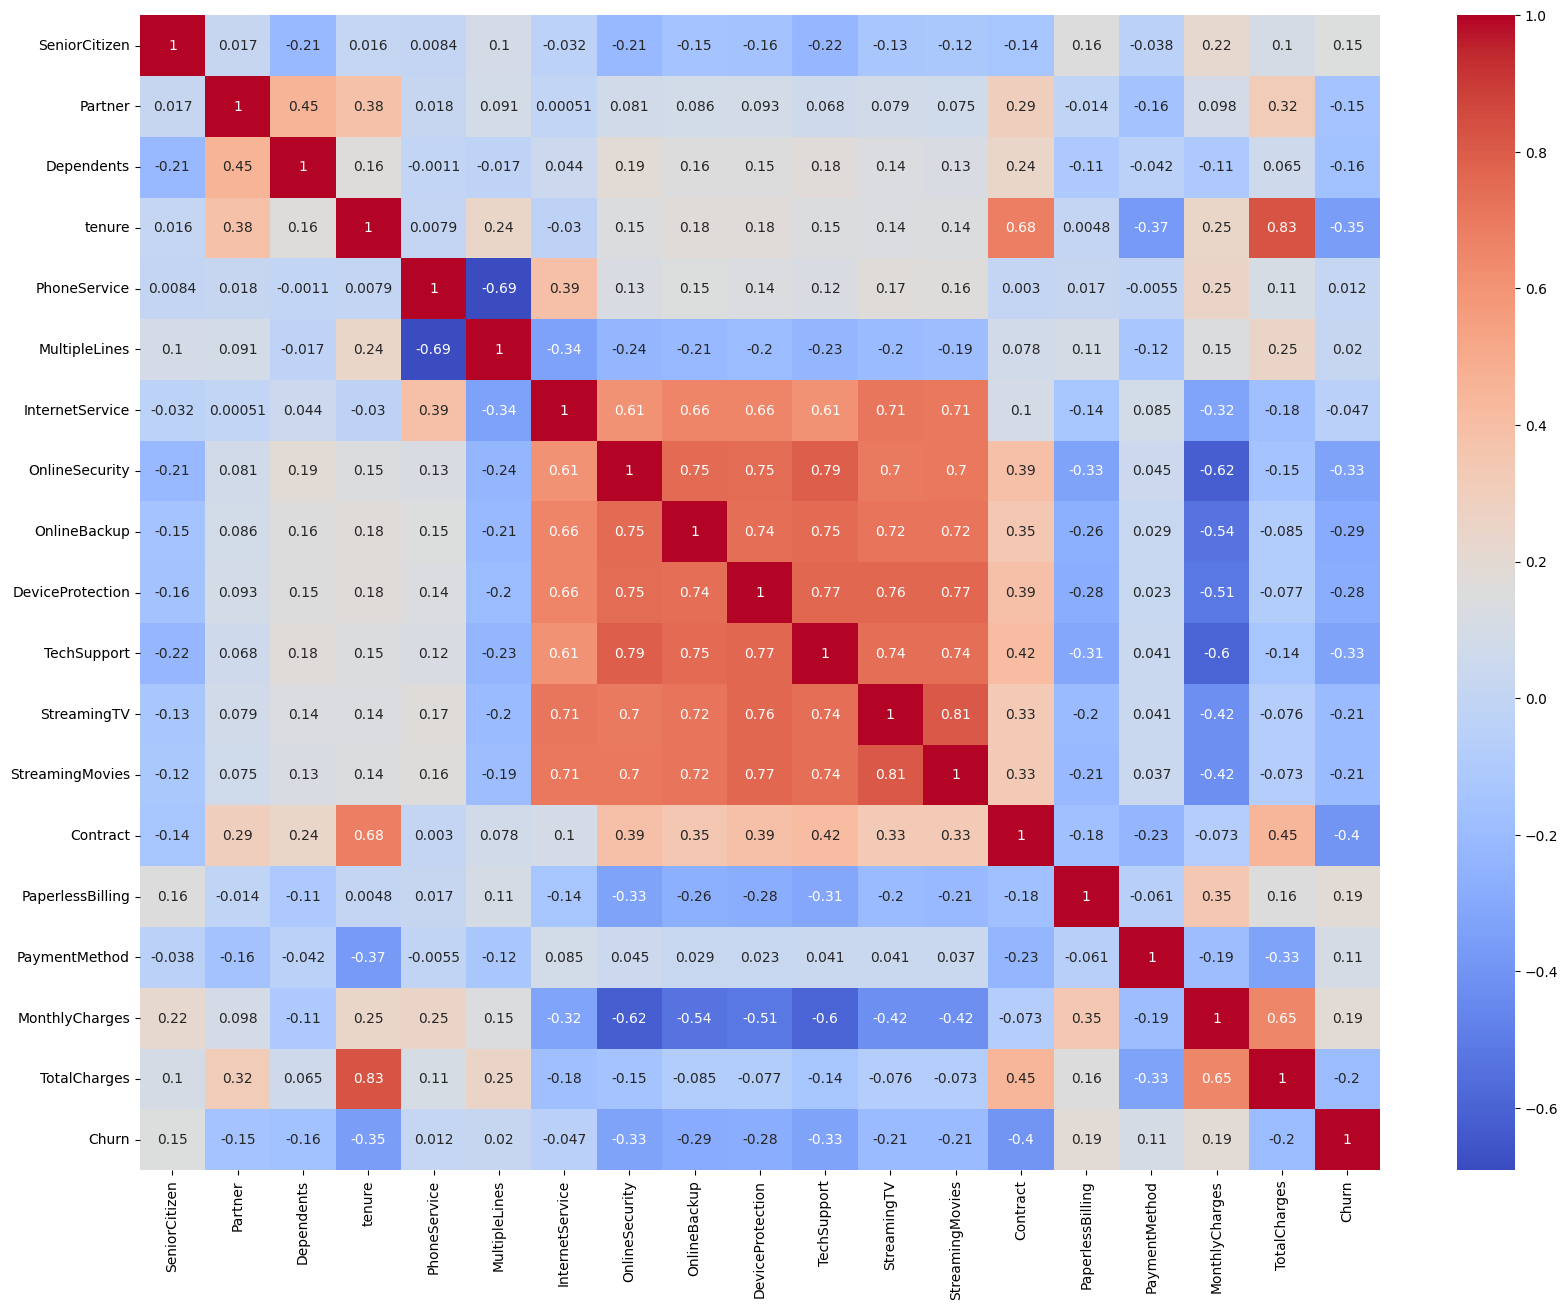

In [29]:
# Calculate correlation matrix
plt.figure(figsize = (20,15))
sns.heatmap(df2.corr(),cmap = 'coolwarm',annot = True);

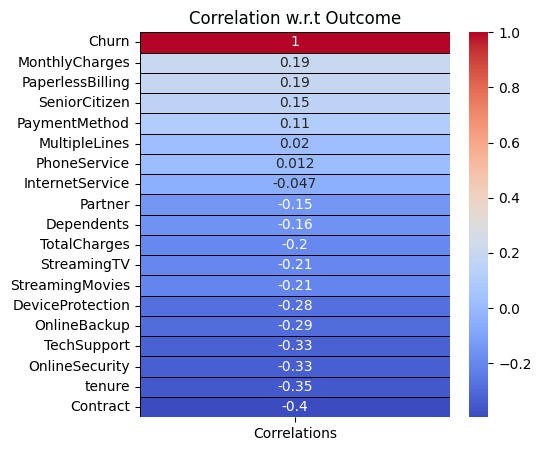

In [30]:
corr = df2.corrwith(df2['Churn']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = 'coolwarm',linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Outcome');

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif
from sklearn.feature_selection import f_classif

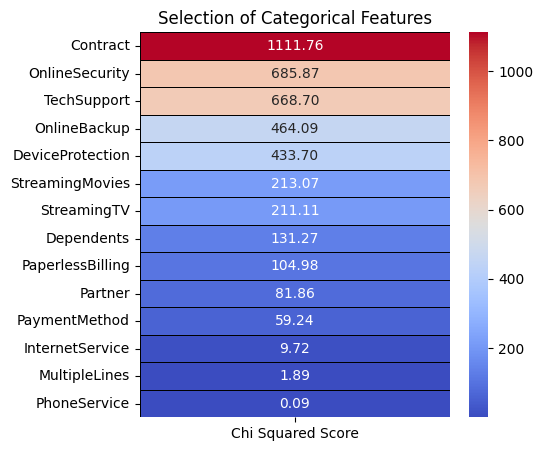

In [32]:

#Feature Selection for Categorical Features
#Chi-Squared Test
features = df2.loc[:,categorical_features]
target = df2.loc[:,'Churn']

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = 'coolwarm',linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

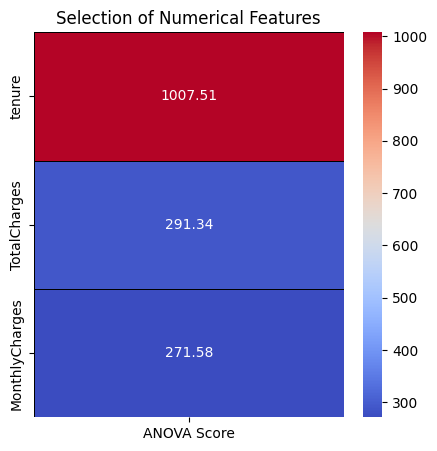

In [33]:
#ANOVA test
features = df2.loc[:,numerical_features]
target = df2.loc[:,'Churn']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = 'coolwarm',linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

In [34]:
df2.drop(columns = ['PhoneService','MultipleLines','InternetService'],inplace = True)
df2

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0.000000,0,1,0,0,0,0,0,1,2,0.115423,0.001275,0
1,0,0,0,0.464789,1,0,1,0,0,0,1,0,3,0.385075,0.215867,0
2,0,0,0,0.014085,1,1,0,0,0,0,0,1,3,0.354229,0.010310,1
3,0,0,0,0.619718,1,0,1,1,0,0,1,0,0,0.239303,0.210241,0
4,0,0,0,0.014085,0,0,0,0,0,0,0,1,2,0.521891,0.015330,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,1,1,0.323944,1,0,1,1,1,1,1,1,3,0.662189,0.227521,0
7028,0,1,1,1.000000,0,1,1,0,1,1,1,1,1,0.845274,0.847461,0
7029,0,1,1,0.140845,1,0,0,0,0,0,0,1,2,0.112935,0.037809,0
7030,1,1,0,0.042254,0,0,0,0,0,0,0,1,3,0.558706,0.033210,1
